## **INTRODUÇÃO**

Nesta atividade, vamos utilizar um algoritmo genético no intuito de encontrar os mínimos globais da `função de Himmelblau`, uma função clássica (e conhecida por possuir múltiplos mínimos globais) usada em problemas de otimização e que pode ser definida como:

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

---

## **CÓDIGO**

Para começar nosso algoritmo, importamos as bibliotecas necessários e as funções definidas no arquivo de formato *.py*:

In [1]:
import random
import matplotlib.pyplot as plt

from funcoes_monstros import populacao_himmelblau as cria_populacao
from funcoes_monstros import funcao_objetivo_pop_himmelblau as funcao_objetivo
from funcoes_monstros import selecao_torneio_min_himmelblau as funcao_selecao
from funcoes_monstros import cruzamento_uniforme as funcao_cruzamento
from funcoes_monstros import mutacao_simples_himmelblau as funcao_mutacao1

Definimos os hiperparâmetros que utilizamos durante nosso algoritmo, incluindo os limites de busca do modelo em relação a x e y:

In [2]:
TAMANHO_POPULACAO = 100
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.025
TAMANHO_TORNEIO = 3
LIMITES = [-10,10]

Criamos uma população baseada no tamanho desejado, quantidade de variáveis e limites definidos:

In [3]:
populacao = cria_populacao(TAMANHO_POPULACAO, 2, LIMITES[0], LIMITES[1])

E realizamos o passo a passo de desenvolvimento do nosso algoritmo, analisando os melhores fitness e indivíduos, além das gerações às quais eles estão associados:

In [4]:
melhores_fitness = []
melhores_individuos = []

menor_fitness_geral = float("inf")
geracao = 0

while menor_fitness_geral > 1e-6:
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao1(proxima_geracao, CHANCE_DE_MUTACAO, LIMITES[0], LIMITES[1])
    
    # Encerramento
    populacao = proxima_geracao
    geracao += 1
    
    fitness = funcao_objetivo(populacao)
    menor_fitness_observado = min(fitness)
    melhores_fitness.append(menor_fitness_observado)
    
    if menor_fitness_observado < menor_fitness_geral:
        menor_fitness_geral = menor_fitness_observado
        indice = fitness.index(menor_fitness_observado)
        candidato = populacao[indice]
        melhores_individuos.append(candidato)
        print(f"Geração {geracao}")
        print(f"  Melhor indivíduo: [x = {candidato[0]:.4f}, y = {candidato[1]:.4f}]")
        print("-" * 40)

Geração 1
  Melhor indivíduo: [x = -2.9429, y = 3.0813]
----------------------------------------
Geração 4
  Melhor indivíduo: [x = 3.6178, y = -2.0073]
----------------------------------------
Geração 11
  Melhor indivíduo: [x = 3.6178, y = -1.9880]
----------------------------------------
Geração 20
  Melhor indivíduo: [x = 3.5951, y = -1.9880]
----------------------------------------
Geração 42
  Melhor indivíduo: [x = 3.5951, y = -1.7653]
----------------------------------------
Geração 45
  Melhor indivíduo: [x = 3.5951, y = -1.8153]
----------------------------------------
Geração 53
  Melhor indivíduo: [x = 3.5951, y = -1.8286]
----------------------------------------
Geração 198
  Melhor indivíduo: [x = 3.5931, y = -1.8463]
----------------------------------------
Geração 245
  Melhor indivíduo: [x = 3.5931, y = -1.8501]
----------------------------------------
Geração 349
  Melhor indivíduo: [x = 3.5876, y = -1.8463]
----------------------------------------
Geração 471
  Melho

Com um resultado agora já definido, plotamos gráficos relacionando o fitness e as gerações (um em escala linear e outro em escala logarítmica), no intuito de entender graficamente o desempenho do modelo:

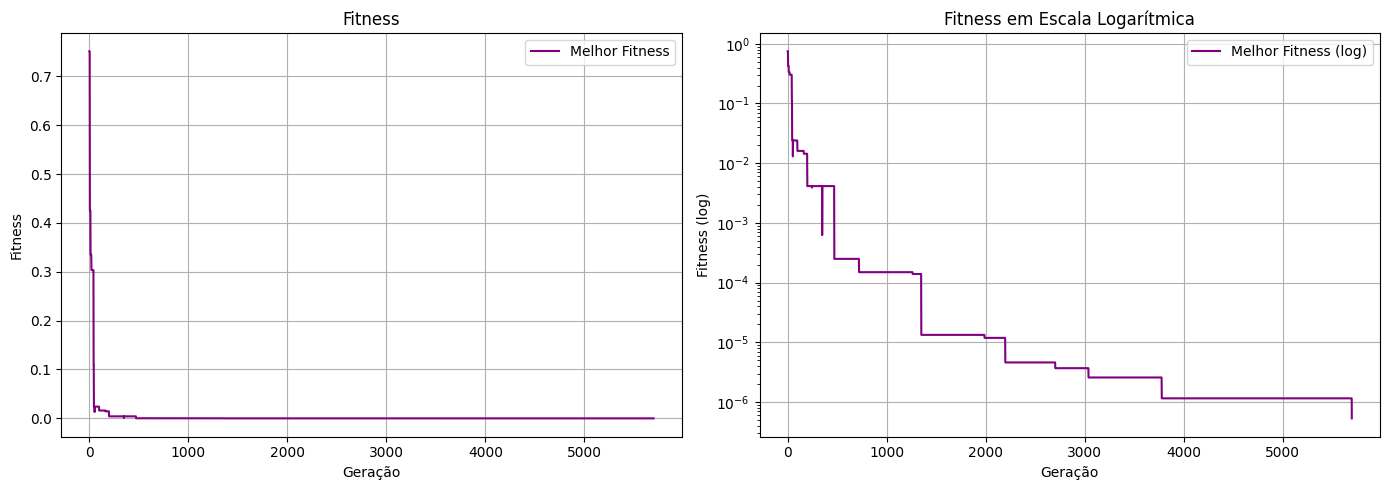

In [5]:
plt.figure(figsize=(14, 5))  

plt.subplot(1, 2, 1)
plt.plot(melhores_fitness, label='Melhor Fitness', color='purple')
plt.title('Fitness')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(melhores_fitness, label='Melhor Fitness (log)', color='purple')
plt.yscale('log') 
plt.title('Fitness em Escala Logarítmica')
plt.xlabel('Geração')
plt.ylabel('Fitness (log)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

E também realizamos um plot de gráfico de coordenadas, baseada na alteração dos valores de x e y com o passar das gerações no modelo até encontrar um ponto de mínimo e resposta válida pro problema:

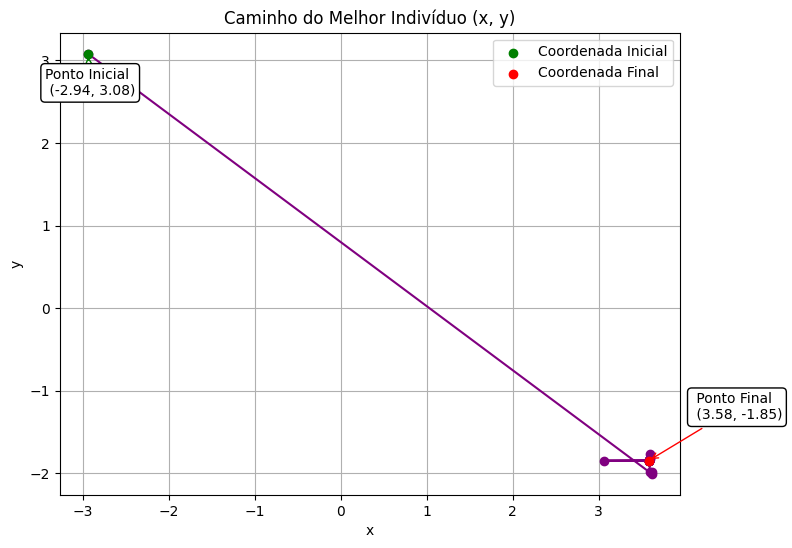

In [6]:
melhores_x = [ind[0] for ind in melhores_individuos]
melhores_y = [ind[1] for ind in melhores_individuos]

plt.figure(figsize=(8, 6))
plt.plot(melhores_x, melhores_y, marker='o', linestyle='-', color='purple')
plt.scatter(melhores_x[0], melhores_y[0], color='green', label='Coordenada Inicial', zorder=5)
plt.annotate(f'Ponto Inicial \n ({melhores_x[0]:.2f}, {melhores_y[0]:.2f})',
             xy=(melhores_x[0], melhores_y[0]),
             xytext=(melhores_x[0] - 0.5, melhores_y[0] - 0.5),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black'),
             arrowprops=dict(arrowstyle='->', color='green'))
plt.scatter(melhores_x[-1], melhores_y[-1], color='red', label='Coordenada Final', zorder=5)
plt.annotate(f' Ponto Final \n ({melhores_x[-1]:.2f}, {melhores_y[-1]:.2f})',
             xy=(melhores_x[-1], melhores_y[-1]),
             xytext=(melhores_x[-1] + 0.5, melhores_y[-1] + 0.5),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black'),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Caminho do Melhor Indivíduo (x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

---

## **CONCLUSÃO**

Com isso, a partir da adaptação e implementação do algoritmo genético, é possível notar que o processo de achar os mínimos da função é efetivo e influenciado pela ordem dos indíviduos analisados, de forma a se aproximar no final de um dos mínimos conhecidos da função, como visto abaixo: 

* `(3.0, 2.0)`
* `(−2.805118, 3.131312)`
* `(−3.779310,−3.283186)`
* `(3.584428,−1.848126)`

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.

**[2]** AFONSOLELIS. Algorítimos genéticos. 2023. Disponível em: https://medium.com/@afonsolelis/algor%C3%ADtimos-gen%C3%A9ticos-61805b619668.